<a href="https://colab.research.google.com/github/DunngenMaster/ml-project/blob/data-cleaning/Data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is a dataset from kaggle(UBER VS LYFT), Lets get some insights from the data and do necessary Cleaning and EDA.

In [ ]:
ride = pd.read_csv('rideshare_kaggle.csv')
ride.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

we can see there are no null values max  except price.

In [ ]:
ride.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

We can see there are 55095 null values in Price column.

5% Threshold for null values

In [ ]:
threshold = len(ride)*0.05
print(threshold)

34653.55


But we have only 55095 null values in the data, we can drop but i want to impute them with median.

In [ ]:
#changing null values of price to median price based on cab type
ride_dict =  ride.groupby('cab_type')['price'].median().to_dict()
print(ride_dict)
ride['price'] = ride['price'].fillna(ride['cab_type'].map(ride_dict))


{'Lyft': 16.5, 'Uber': 12.5}


Lets check the null values of the price

In [ ]:
ride.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Check the propotion of the cab_type

In [ ]:
ride['cab_type'].value_counts(normalize=True)

cab_type
Uber    0.556455
Lyft    0.443545
Name: proportion, dtype: float64

lets check the dtypes

In [ ]:
ride.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

Every thing seems ok but ,date time should have date time dtype not object.

In [ ]:
#changing date time dtype
ride['datetime'] = pd.to_datetime(ride['datetime'])
ride['datetime'].dtype
#changing cabtype to category
ride['cab_type'] = ride['cab_type'].astype('category')
ride['cab_type'].dtype

CategoricalDtype(categories=['Lyft', 'Uber'], ordered=False, categories_dtype=object)

Lets check for the outliers for price

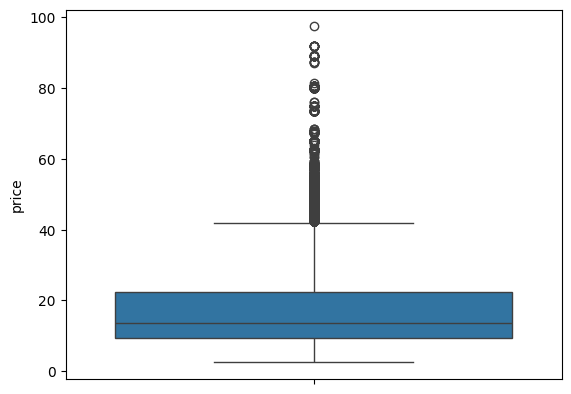

In [ ]:
sns.boxplot(data=ride,y='price')
plt.show()




We can see there are bunch of datapoints above upper quartile.

In [ ]:
#outliers detection
sf = ride['price'].quantile(0.75)
tf = ride['price'].quantile(0.25)
iqr = sf-tf
upper = sf+(1.5*iqr)
lower = sf -(1.5*iqr)
outlier_price = ride[(ride['price']<lower)|(ride['price']>upper)][['source','destination','cab_type']]
count = outlier_price.groupby(by=['source','destination']).value_counts()
index = count.nlargest(10)
index


source                   destination              cab_type
Financial District       Boston University        Lyft        741
Boston University        Financial District       Lyft        683
Fenway                   Financial District       Lyft        649
Financial District       Fenway                   Lyft        593
Theatre District         Boston University        Lyft        503
Financial District       Boston University        Uber        475
Northeastern University  Financial District       Lyft        379
Financial District       Northeastern University  Uber        292
Boston University        Financial District       Uber        277
Financial District       Northeastern University  Lyft        191
Name: count, dtype: int64

This are the source and destination which people book more frequently,so, there is no doubt why this prices are high.

Lets check which cab_type is more expensive

In [ ]:
ride.groupby('cab_type')['price'].mean()

C:\Users\STSC\AppData\Local\Temp\ipykernel_19552\3926626178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride.groupby('cab_type')['price'].mean()


cab_type
Lyft    17.351396
Uber    15.324577
Name: price, dtype: float64

Which cab type has more probability that we can surge multiplier [1 is no problem , above 1 is the extra we should pay like actual_price *1.25,actual_price*2,based on demand]

In [ ]:
ride.groupby('cab_type')['surge_multiplier'].value_counts()

C:\Users\STSC\AppData\Local\Temp\ipykernel_19552\2495672954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride.groupby('cab_type')['surge_multiplier'].value_counts()


cab_type  surge_multiplier
Lyft      1.00                286433
          1.25                 11085
          1.50                  5065
          1.75                  2420
          2.00                  2239
          2.50                   154
          3.00                    12
Uber      1.00                385663
          1.25                     0
          1.50                     0
          1.75                     0
          2.00                     0
          2.50                     0
          3.00                     0
Name: count, dtype: int64

It's clear that we will get surge multiplier when we use LYFT, And also we can observe that people are more interested booking lyft then uber.

Data visualization